## Hausaufgabe 4

#### **Abgabe** <br> 27.05. 12:00 Uhr (via studIP) 
#### **Verteidigung** <br> 30.05. 08:00-11:00 Uhr 

Mit jedem Blatt können **maximal** 5 Prozentpunkte Bonus für die Klausur erreicht werden, falls:
1) mind. 60% des Arbeitsblattes korrekt bearbeitet wurden 
2) das Arbeitsblatt erfolgreich verteidigt (den Tutoren erklärt) wurde.

*Rahmenbedingungen*:
- Jede Gruppe muss sich bei studIP für einen Slot zur Verteidigung registrieren.
- Erfolgreiche Verteidigung bedeutet, dass ein von uns ausgewähltes Team-Mitglied die Lösung erklärt und Fragen dazu beantwortet.
- ChatGPT und andere Hilfsmittel dürfen verwendet werden, müssen aber zitiert werden.
- Der Code muss ohne Hilfsmittel erläutert werden.
- Wir bewerten nicht nur die Korrektheit der Ergebnisse, sondern auch ob der Code effizient, einfach zu verstehen, aufgeräumt und gut dokumentiert ist.
- Jede Gruppe gibt nur eine Lösung als Zip-Datei ab, die mit dem Namen und der Matrikelnummer eines Mitglieds versehen ist. Also z.B. `mustermann_12345678.zip` 

In [1]:
import pandas as pd
import seaborn as sns

## Aufgabe 1: Pandas Basics (14%)

#### 1. (2%) Importieren Sie die csv-Datei `tips` von https://github.com/mwaskom/seaborn-data.

In [2]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
df = pd.read_csv(url)

# Display the dataframe
print(df)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


#### 2. (2%) Wie viele Spalten und Zeilen hat dieser Dataframe?

In [4]:
print(f"Zeilen: {df.shape[0]}")
print(f"Spalten: {df.shape[1]}")

Zeilen: 244
Spalten: 7


#### 3. (2%) Welche Variablen beinhalten die Spalten des Dataframes?

In [5]:
columns = df.columns
print(list(columns)) #sonst wird dtype mit angezeigt

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']


#### 4. (2%) Wie viele numerische und nicht-numerische Spalten enthält der Dataframe?

In [6]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
non_numeric_columns = df.select_dtypes(include=['object']).columns

numeric_count = len(numeric_columns)
non_numeric_count = len(non_numeric_columns)

print(f"Numerische Spalten: {numeric_count}")
print(f"Nicht-numerische Spalten: {non_numeric_count}")

Numerische Spalten: 3
Nicht-numerische Spalten: 4


#### 5. (2%) Wie hoch ist der durchschnittliche Betrag einer Rechnung?

In [7]:
average_total_bill = df['total_bill'].mean()
print(f"Durchschnittlicher Betrag einer Rechnung: {average_total_bill}")

Durchschnittlicher Betrag einer Rechnung: 19.78594262295082


#### 6. (2%) Untersuchen Sie mit Hilfe einer geeigneten Visualisierung, ob es einen Zusammenhang zwischen der Höhe des Trinkgeldes (tip) und der Gesamtrechnung (total_bill) geben könnte.

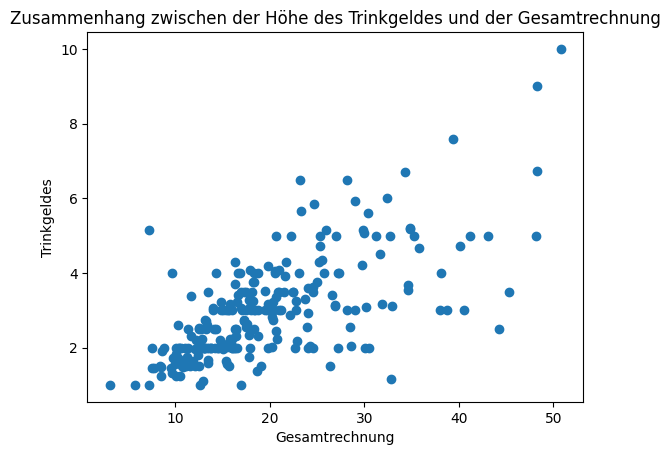

In [8]:
import matplotlib.pyplot as plt

plt.scatter(df['total_bill'], df['tip'])
plt.xlabel('Gesamtrechnung')
plt.ylabel('Trinkgeldes')
plt.title('Zusammenhang zwischen der Höhe des Trinkgeldes und der Gesamtrechnung')
plt.show()

#### 7. (2%) Geben Frauen mehr Trinkgeld als Männer? - Wie hoch ist der Mittelwert der Trinkgelder von Männern und Frauen?

In [12]:
mean_tip_by_gender = df.groupby('sex')['tip'].mean()
print(mean_tip_by_gender)

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64


---

## Aufgabe 2: Data Preprocessing (26%)

Sie erhalten eine csv-Datei mit Daten, die bereinigt werden muss, bevor wir sie für die weitere Analyse verwenden können.

Schauen Sie sich die Datei in einem csv-Viewer Ihrer Wahl an (z.B. die integrierte Lösung in jupyter-lab oder Microsoft Excel).
Was fällt Ihnen auf? 

#### a) (5%) Weniger als die Hälfte der Datei wird korrekt angezeigt. Schreiben Sie ein Bash-Skript, um die Datei in eine richtige csv-Datei zu konvertieren (sodass alle Zeilen richtig angezeigt werden). 

Tipp: Nützliche Befehle sind `sed`, `head` und `tail`.

In [13]:
import subprocess

# Pfad zum Shell-Script
shell_script_path = "cleaner.sh"

# Ausführen des Shell-Scripts
subprocess.run(["bash", shell_script_path], check=True)


Die Konvertierung wurde abgeschlossen. Die Ausgabedatei lautet: newtitanic.csv


CompletedProcess(args=['bash', 'cleaner.sh'], returncode=0)

#### b) (1%) Laden Sie Ihre veränderte csv-Datei mithilfe von Pandas in einen Dataframe.

In [14]:
# Pfad zur korrigierten CSV-Datei
csv_file_path = "newtitanic.csv"

# Laden der CSV-Datei in einen DataFrame
df = pd.read_csv(csv_file_path)




#### c) (4%) Untersuchen Sie die Spalte `Sex`. Finden Sie alle unterschiedlichen Werte, die in dieser Spalte verwendet werden.

In [15]:
# Verwendung der unique()-Methode, um alle unterschiedlichen Werte in der Spalte "Sex" zu finden
unique_sex_values = df['Sex'].unique()

# Anzeigen der gefundenen Werte
print("Unterschiedliche Werte in der Spalte 'Sex':")
print(list(unique_sex_values))


Unterschiedliche Werte in der Spalte 'Sex':
male
1
female
Male
-1
mle
Female
mal
femal
femaale
femalle
m
f
femae


#### d) (8%) Bearbeiten Sie den Datensatz mithilfe von Pandas, sodass in der Spalte `Sex` nur eine binäre und konsistente Unterscheidung von männlich (m) und weiblich (f) zu finden ist. 

In [61]:

# Pfad zur korrigierten CSV-Datei
csv_file_path = "newtitanic.csv"

# Laden der CSV-Datei in einen DataFrame
df = pd.read_csv(csv_file_path)

# Überprüfung und Aktualisierung der Werte in der Spalte "Sex"
for index, row in df.iterrows():
    sex_value = str(row['Sex']).lower()
    if 'f' in sex_value or '1' in sex_value:
        df.at[index, 'Sex'] = 'f'
    elif '-1' in sex_value:
        df.at[index, 'Sex'] = 'm'
    else:
        df.at[index, 'Sex'] = 'm'

# Speichern des aktualisierten DataFrames in einer neuen CSV-Datei
updated_csv_file_path = "updated_titanic.csv"
df.to_csv(updated_csv_file_path, index=False)

print("Die Spalte 'Sex' wurde überprüft und aktualisiert. Die aktualisierte CSV-Datei wurde gespeichert unter:", updated_csv_file_path)


Die Spalte 'Sex' wurde überprüft und aktualisiert. Die aktualisierte CSV-Datei wurde gespeichert unter: updated_titanic.csv


#### e) (8%) Bereinigen Sie die Spalte `Name`. Entfernen Sie Anreden wie *Mr., Mrs., Master*,... Verwenden Sie den in Klammern angegebenen Namen, falls vorhanden.

In [62]:
import re

# Pfad zur aktualisierten CSV-Datei
csv_file_path = "updated_titanic.csv"

# Laden der CSV-Datei in einen DataFrame
df = pd.read_csv(csv_file_path)

# Funktion zur Bereinigung der Spalte "Name"
def clean_name(name):
    # Suchen nach der Anrede und dem Namen in Klammern
    match = re.search(r"\((.*?)\)", name)
    if match:
        # Extrahieren des Namens aus den Klammern
        cleaned_name = match.group(1)
    else:
        # Wenn keine Klammern gefunden werden, verwenden wir den gesamten Namen
        cleaned_name = name
    # Entfernen von Anreden wie "Mr.", "Mrs.", "Miss.", "Master." usw.
    cleaned_name = re.sub(r"(Mr\.|Mrs\.|Miss\.|Master\.)", "", cleaned_name)
    # Entfernen von führenden und nachfolgenden Leerzeichen
    cleaned_name = cleaned_name.strip()
    return cleaned_name

# Bereinigen der Spalte "Name"
df['Name'] = df['Name'].apply(clean_name)

# Pfad zur gespeicherten bereinigten CSV-Datei
cleaned_csv_file_path = "cleaned_updated_titanic.csv"

# Speichern des aktualisierten DataFrames in einer neuen CSV-Datei
df.to_csv(cleaned_csv_file_path, index=False)

print("Die bereinigte CSV-Datei wurde unter '{}' gespeichert.".format(cleaned_csv_file_path))


Die bereinigte CSV-Datei wurde unter 'cleaned_updated_titanic.csv' gespeichert.


---

## Aufgabe 3: Seaborn Plotting (60%)

#### 1. (0%) Laden Sie den bereinigten Titanic-Datensatz als Pandas DataFrame (https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv)

In [63]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
df = pd.read_csv(url)

# Display the dataframe
print(df)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

#### 2. Beziehen Sie sich für die Beantwortung der folgenden Fragen auf von Ihnen erstellte Diagramme. Nutzen Sie Seaborn zum Plotten und beachten Sie die Guidelines aus der Vorlesung. 

#### a. (10%) Wie ist die Verteilung des Alters der Passagiere? Nutzen Sie auch statistische Kennzahlen zur Beschreibung der Verteilung.

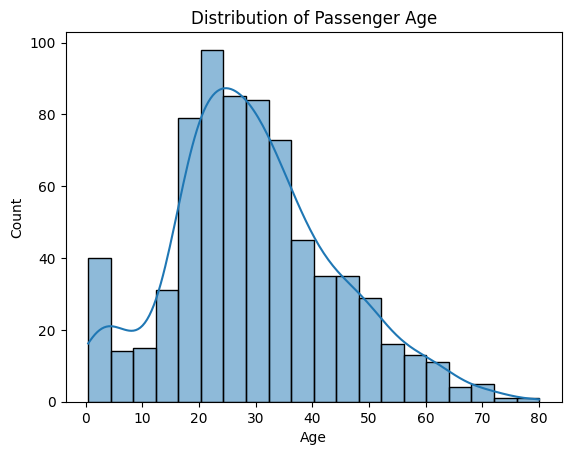

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64


In [64]:

# Plot the distribution of age
sns.histplot(df['age'].dropna(), kde=True)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Passenger Age')

# Show the plot
plt.show()

# Describe the distribution using statistical measures
age_stats = df['age'].describe()
print(age_stats)

#### b. (10%) Waren die Passagiere im Allgemeinen jünger als der Durchschnitt oder älter?

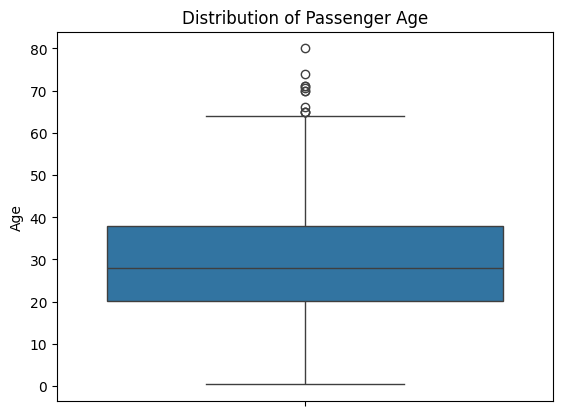

In [65]:
# Plotten des Alters
sns.boxplot(data=df, y='age')

# Beschriften der Achsen und des Titels
plt.ylabel('Age')
plt.title('Distribution of Passenger Age')

# Anzeigen des Plots
plt.show()

#### c. (10%) Ändert sich das Ergebnis in (b) für Männer und Frauen?

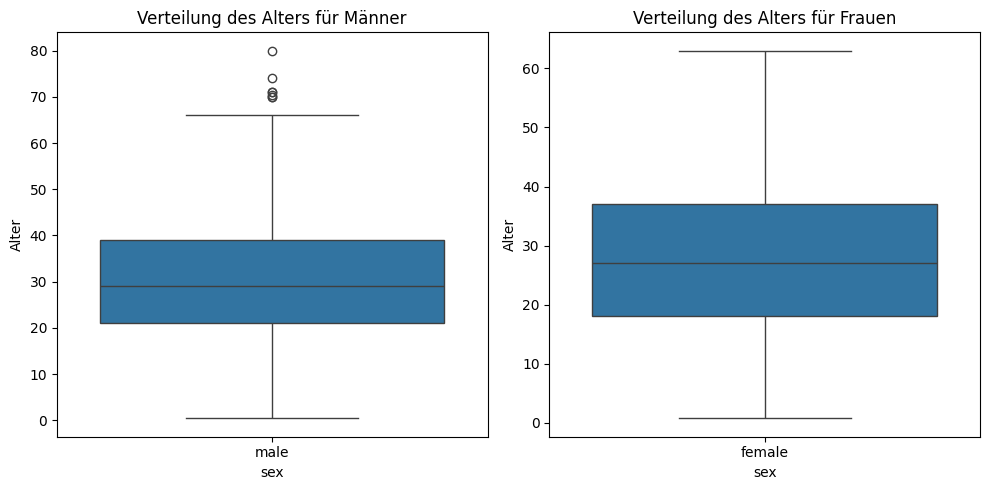

In [66]:
import matplotlib.pyplot as plt

# Erstelle einzelene Datensätze je Geschlecht
df_male = df[df['sex'] == 'male']
df_female = df[df['sex'] == 'female']


# Erstellen Sie eine Figur und eine Achsenmatrix mit 1 Zeile und 2 Spalten
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot 1: Verteilung des Alters für Männer
sns.boxplot(data=df_male, x='sex', y='age', ax=axs[0])
axs[0].set_ylabel('Alter')
axs[0].set_title('Verteilung des Alters für Männer')

# Plot 2: Verteilung des Alters für Frauen
sns.boxplot(data=df_female, x='sex', y='age', ax=axs[1])
axs[1].set_ylabel('Alter')
axs[1].set_title('Verteilung des Alters für Frauen')

# Passen Sie den Layout-Abstand zwischen den Plots an
plt.tight_layout()

# Zeigen Sie die Plots an
plt.show()

#### d. (10%) Welches Geschlecht hatte eine höhere Überlebensrate?

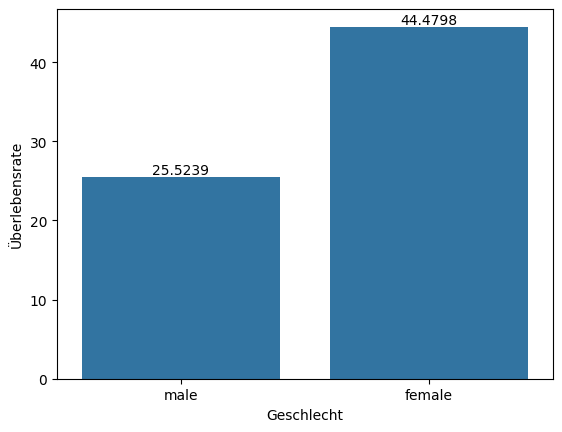

In [67]:
# Plotten der durchschnittliche Ticketpreise pro Klasse
ax = sns.barplot(data=df, x='sex', y='fare', errorbar=None)

# Beschriften der Achsen und des Titels
plt.xlabel('Geschlecht')
plt.ylabel('Überlebensrate')
ax.bar_label(ax.containers[0])

# Anzeigen des Plots
plt.show()

#### e. (10%) Wie hoch ist der durchschnittliche Ticketpreis (`fare`) für jede Klasse? 

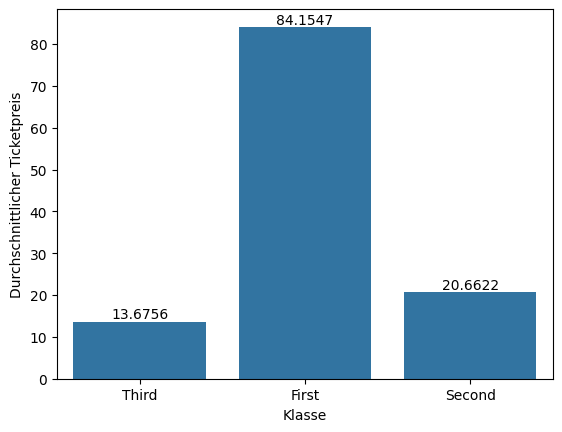

In [68]:
# Plotten der durchschnittliche Ticketpreise pro Klasse
ax = sns.barplot(data=df, x='class', y='fare', errorbar=None)

# Beschriften der Achsen und des Titels
plt.xlabel('Klasse')
plt.ylabel('Durchschnittlicher Ticketpreis')
ax.bar_label(ax.containers[0])

# Anzeigen des Plots
plt.show()

#### f. (10%) Welche Fahrkartenklasse hatte eine höhere Überlebensrate?

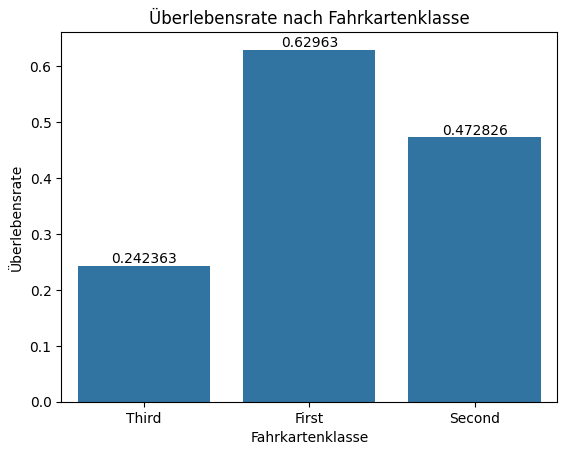

In [69]:
# Plotten der Überlebensraten
ax = sns.barplot(data=df, x='class', y='survived', errorbar=None)

# Beschriften der Achsen und des Titels
plt.xlabel('Fahrkartenklasse')
plt.ylabel('Überlebensrate')
plt.title('Überlebensrate nach Fahrkartenklasse')
ax.bar_label(ax.containers[0])

# Anzeigen des Plots
plt.show()